# 1. Import the necessary libraries (2.5 marks)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns




import matplotlib.pyplot as plt


# 2. Read the data as a data frame (2.5 marks)

In [22]:
df = pd.read_csv('bank-full.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
a = df.duplicated()

print("no of duplicate rows:", a.sum())

no of duplicate rows: 0


# 3) Perform basic EDA which should include the following and print out your insights at every step. (15 marks)
a. Shape of the data (2 marks)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# a. Shape of the data (2 marks)

In [25]:
df['balance'] = df['balance'].astype('object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


In [27]:
hpIsDigit = pd.DataFrame(df.balance.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
df[hpIsDigit['balance'] == False] 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [28]:
df.shape

(45211, 17)

In [29]:
df['age'] = df['age'].astype('float')     #Changing the datatype of age

In [30]:
df['balance']= df['balance'].astype('float')     #Changing the datatype of balance

# 3b. Data type of each attribute (2 marks)

In [31]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null float64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


# 3)d) 5 Point summary of numerical attributes (3 marks)

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [33]:
df.describe(include = np.object).transpose()  #for categorical values

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


In [34]:
num_cols = list(df.describe().columns)
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# 3)e). Checking the presence of outliers (4 marks)

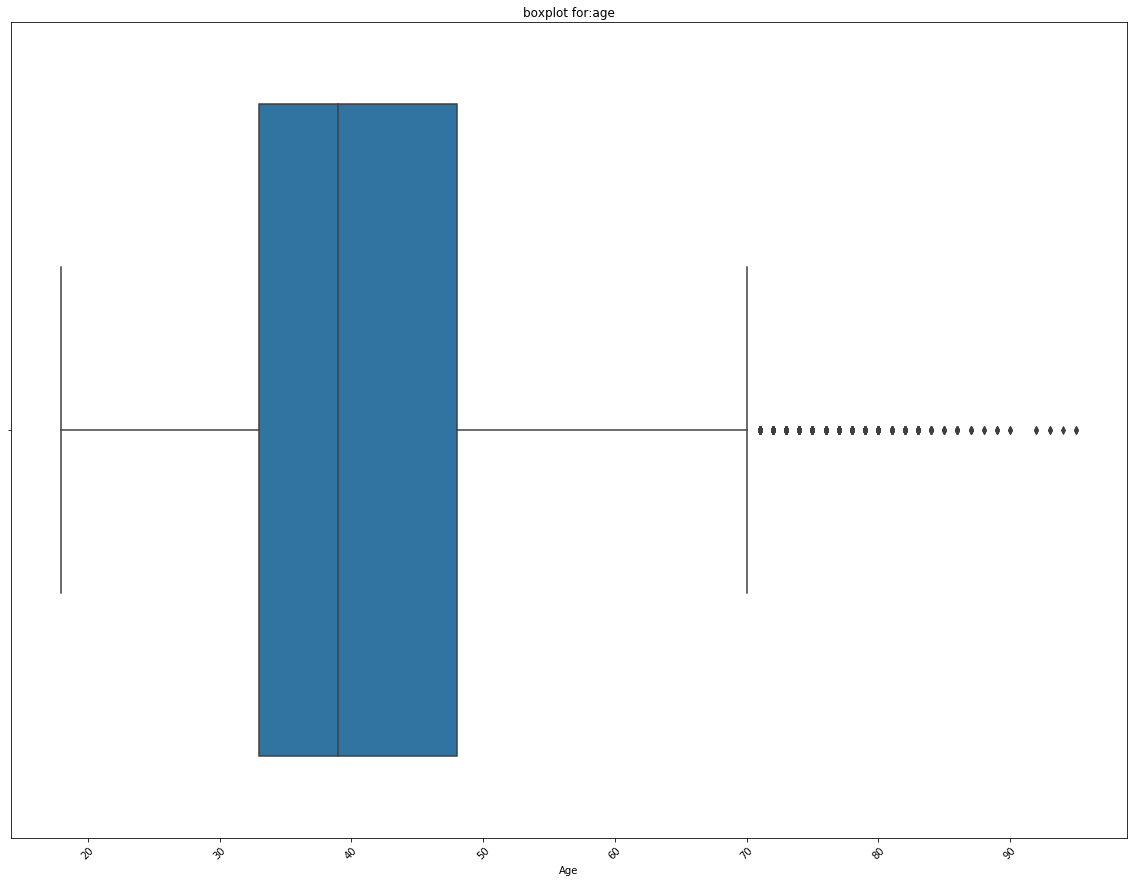

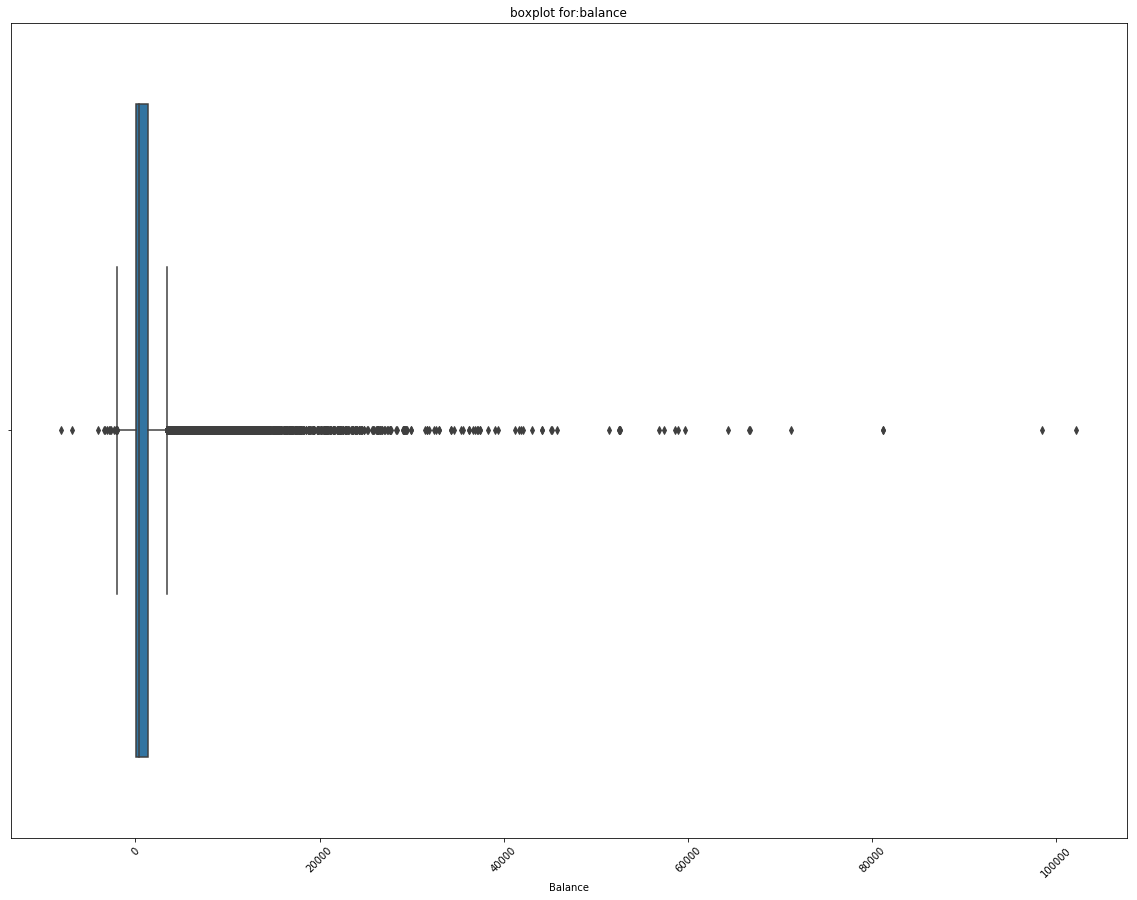

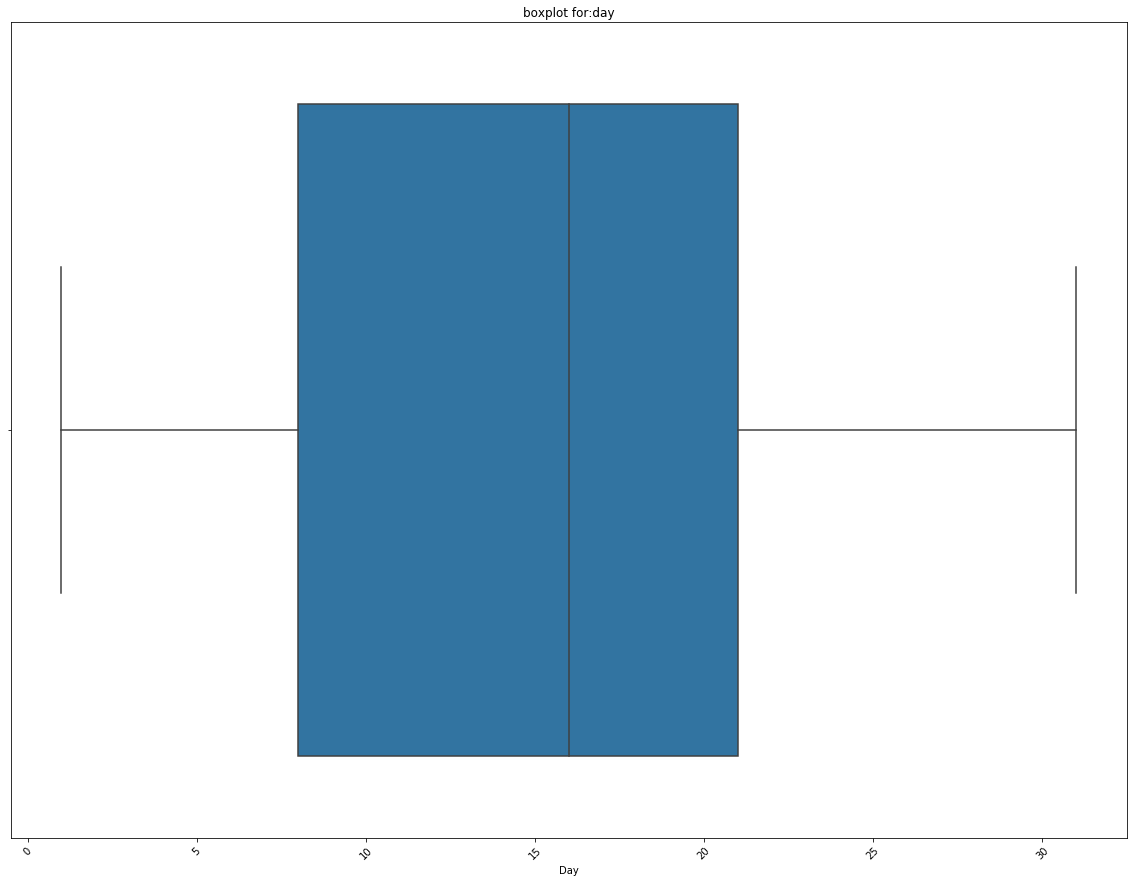

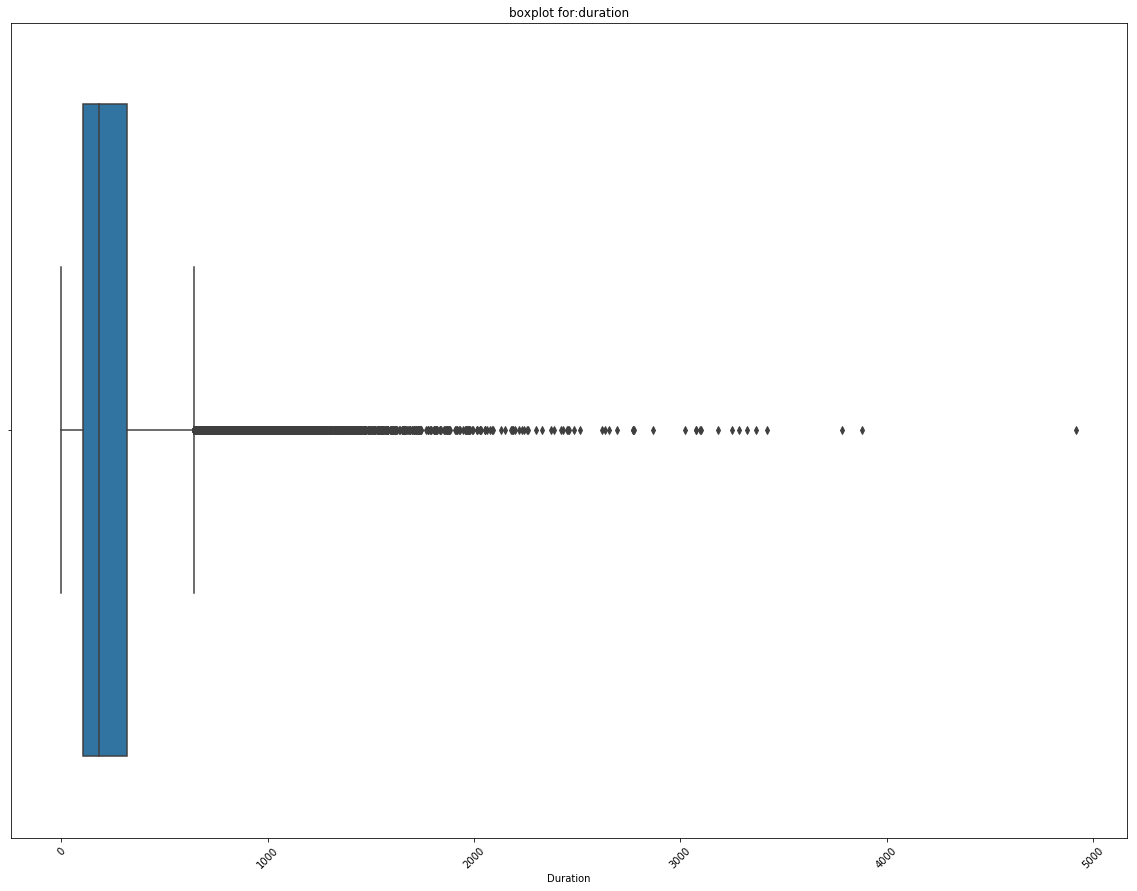

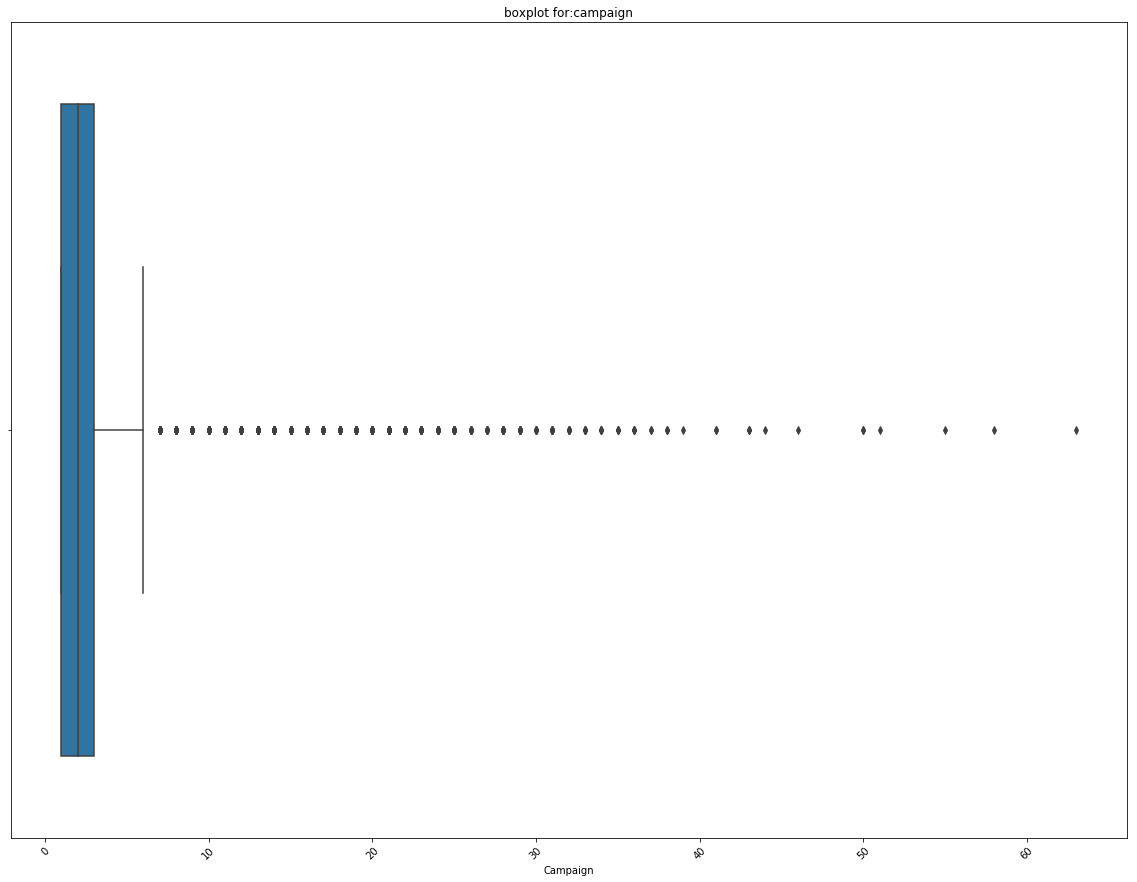

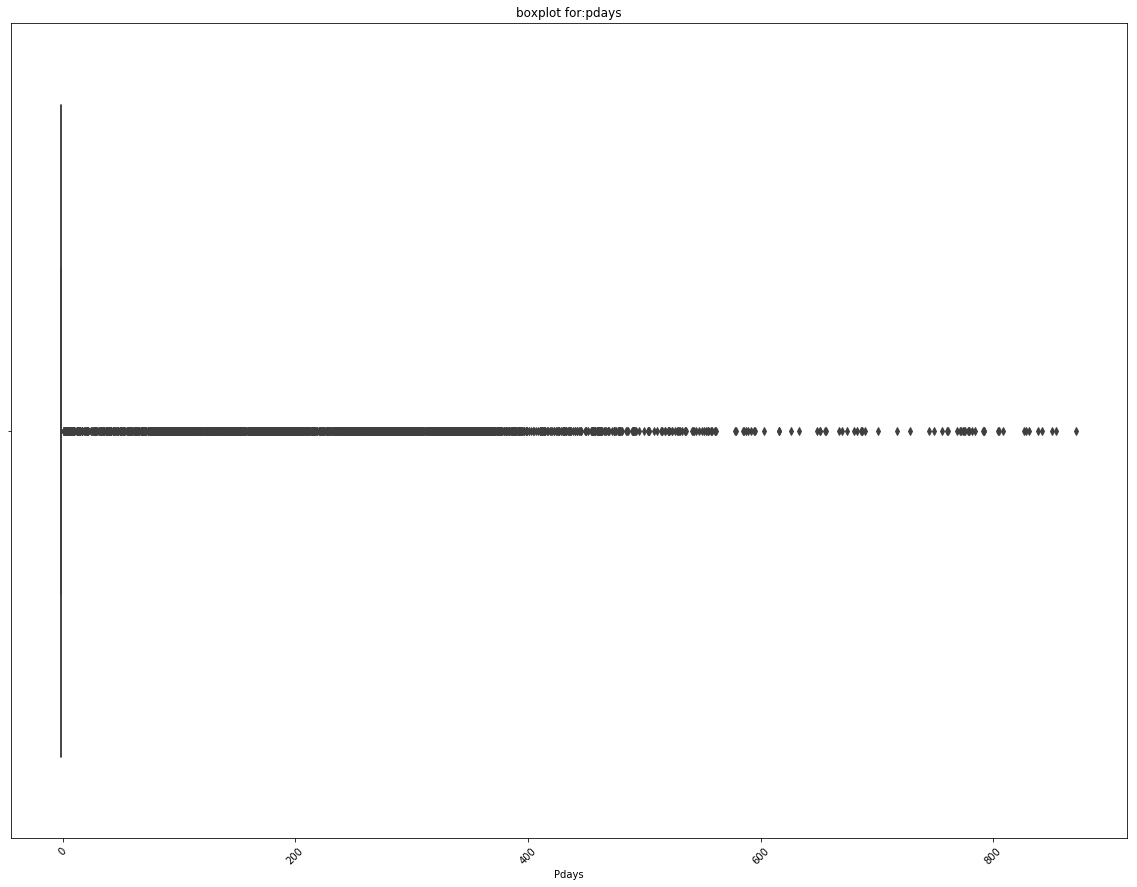

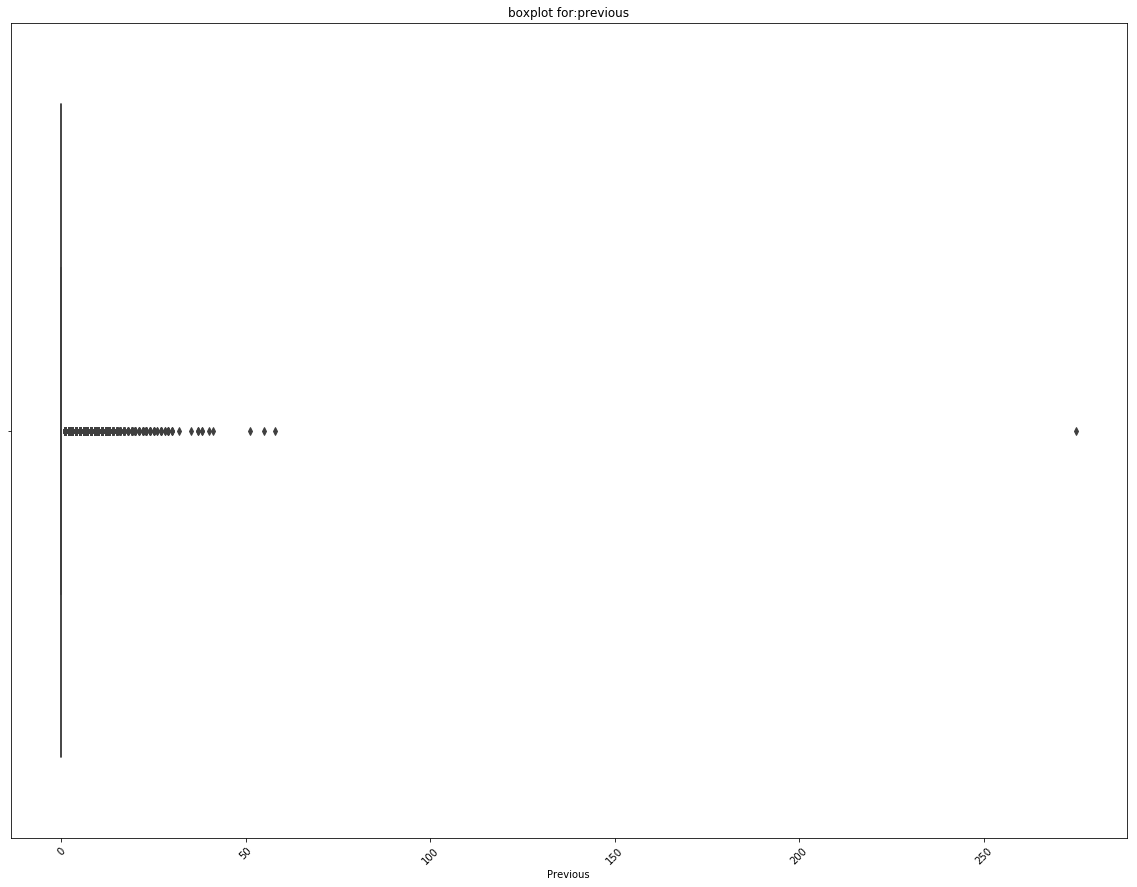

In [35]:
for num in num_cols:
    plt.figure(figsize=(20,15))
    sns.boxplot(df[num])
    plt.xlabel(num.capitalize())
    
    plt.title("boxplot for:" +num)
    plt.savefig("Boxplot/boxplot For {}.jpg".format(num.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)
    

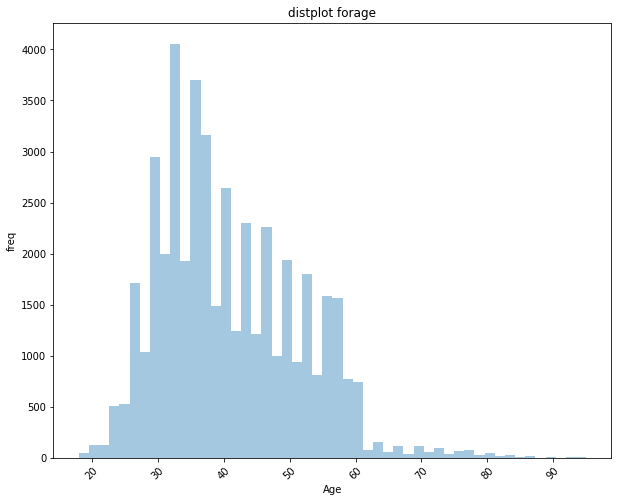

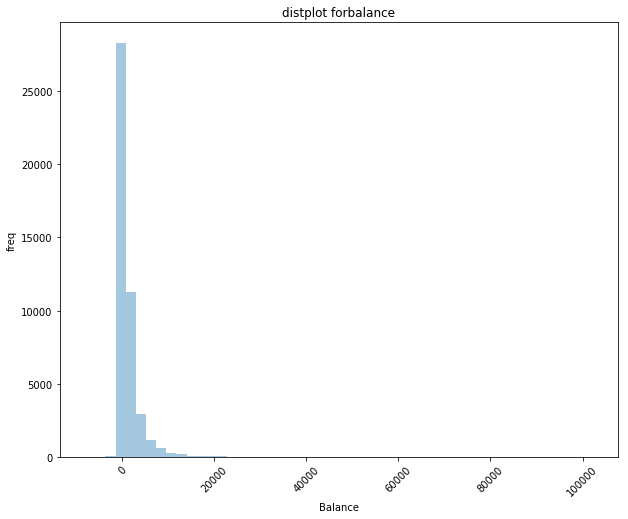

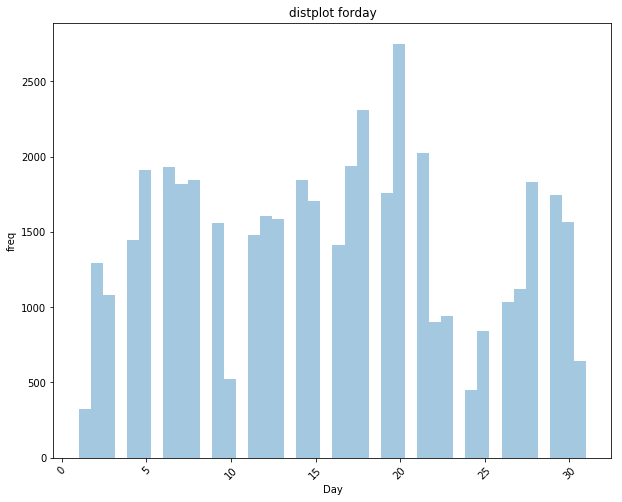

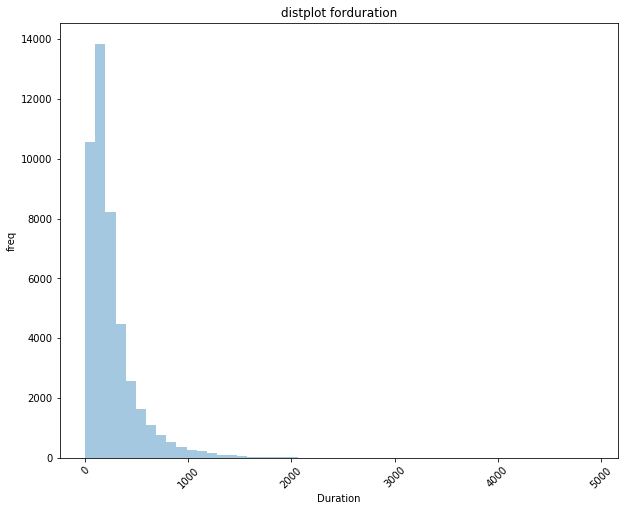

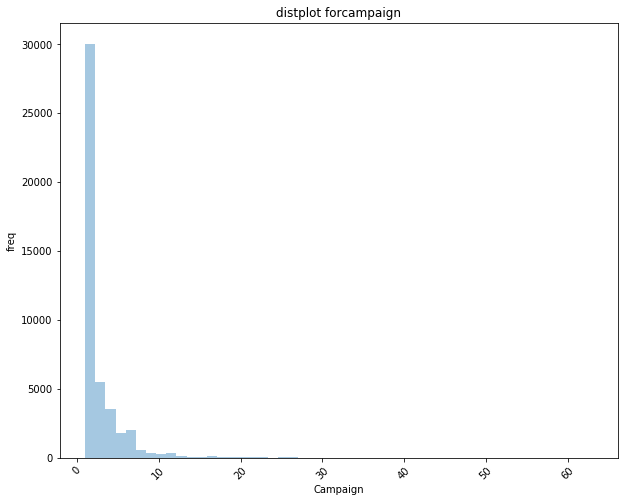

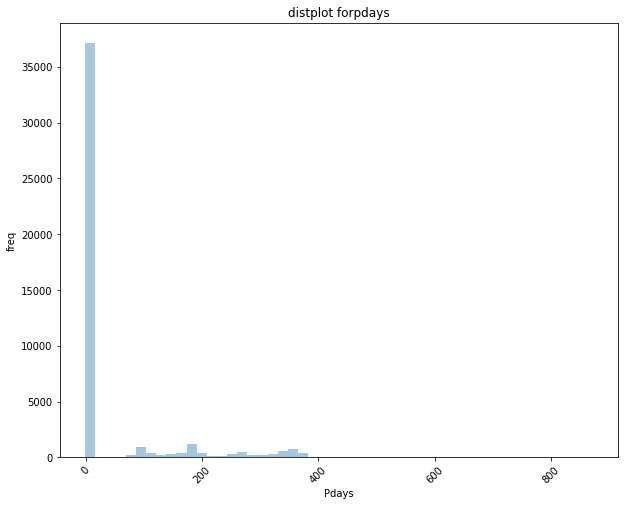

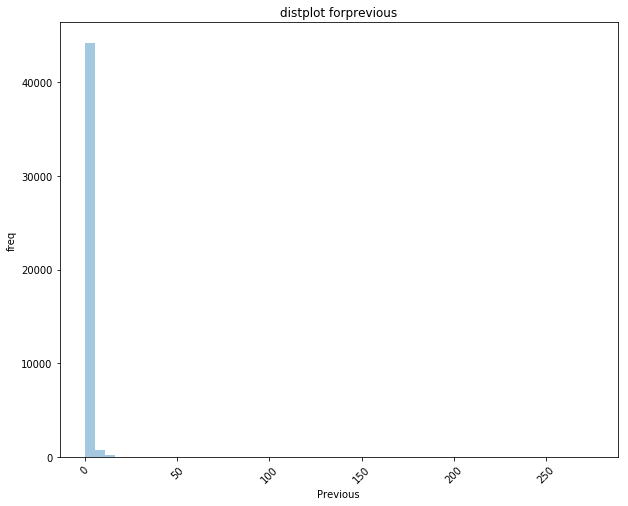

In [36]:
for cols in num_cols:
    plt.figure(figsize = (10,8))
    sns.distplot(df[cols], kde = False)
    plt.xlabel(cols.capitalize())
    plt.ylabel("freq")
    plt.title("distplot for" +cols)
    plt.savefig("Distplot/distplot For {}.jpg".format(cols.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)

(array([-100.,    0.,  100.,  200.,  300.]),
 <a list of 0 Text xticklabel objects>)

<Figure size 720x576 with 0 Axes>

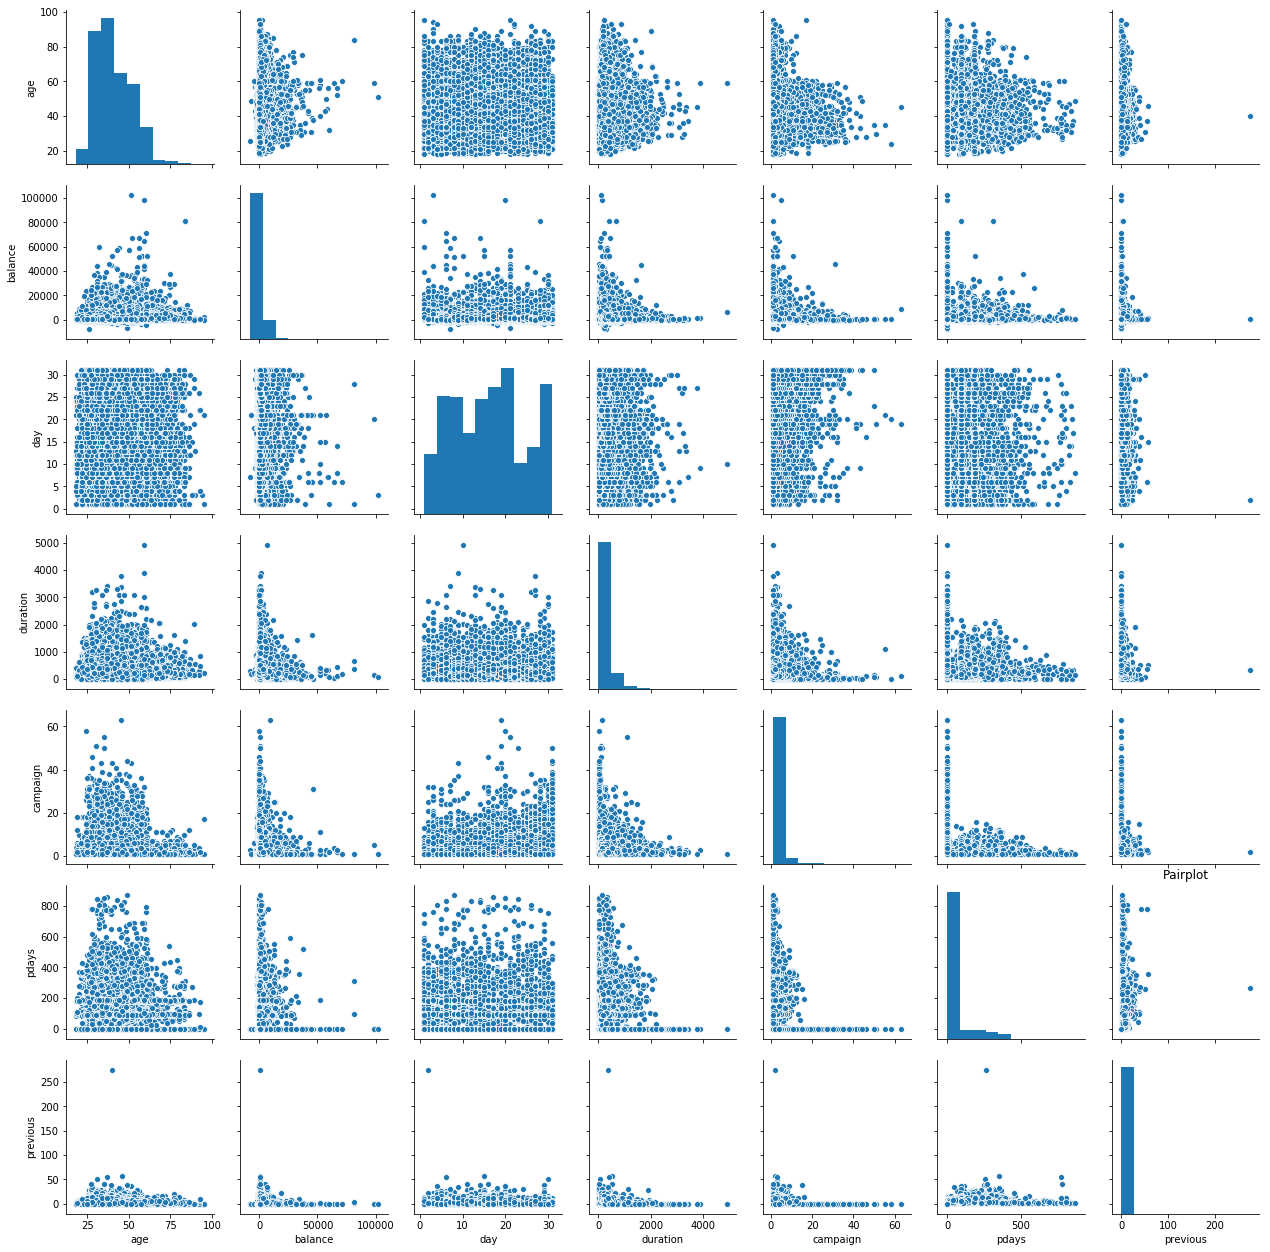

In [37]:
plt.figure(figsize = (10,8))
sns.pairplot(df[num_cols])
plt.title('Pairplot')
plt.savefig("Pairplot/pairplot.jpg", dpi =100, bbox_tight = True)
plt.xticks(rotation = 45)

In [38]:
cat_cols = list(df.describe(include = np.object).columns) # all categorical columns
cat_cols


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

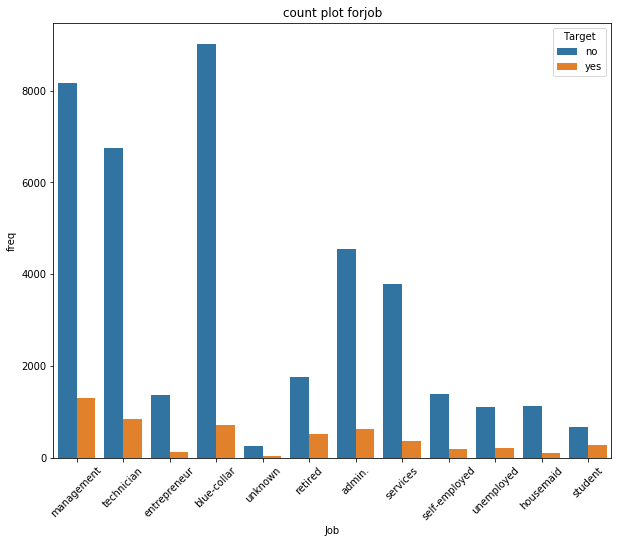

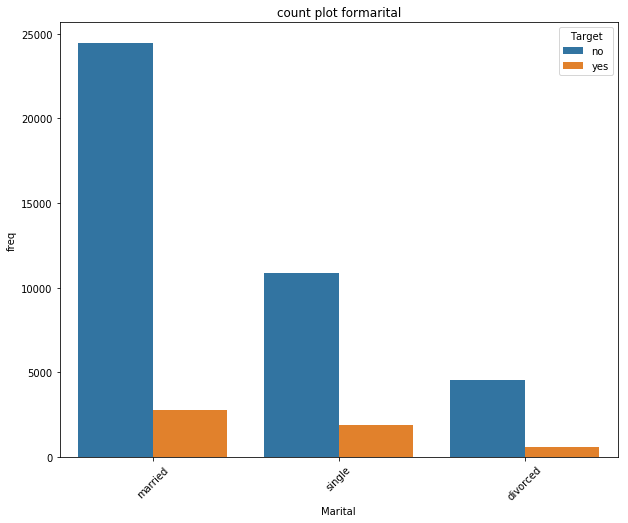

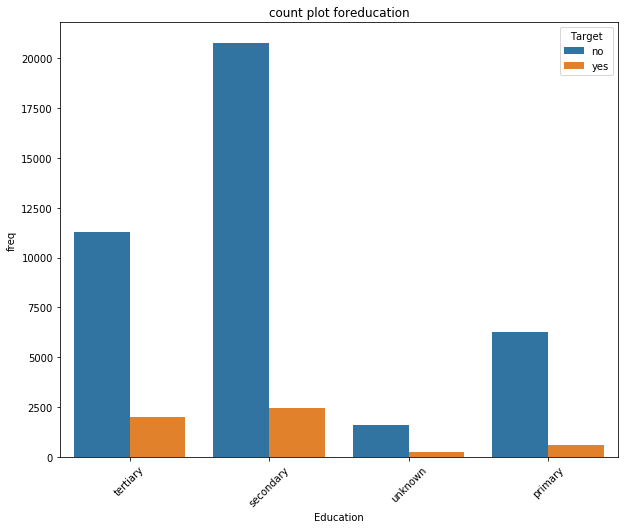

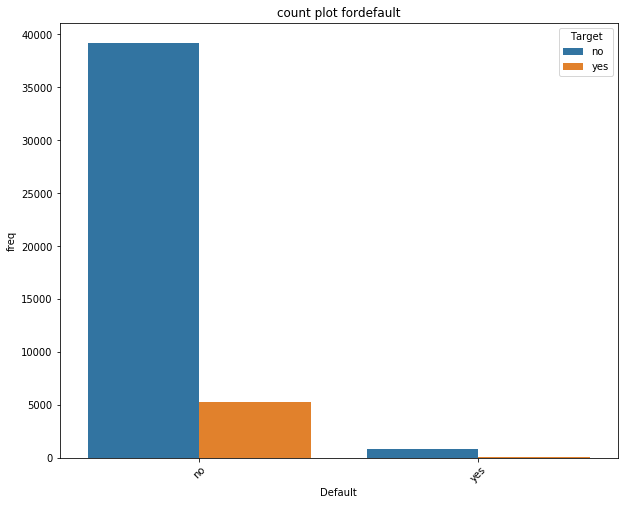

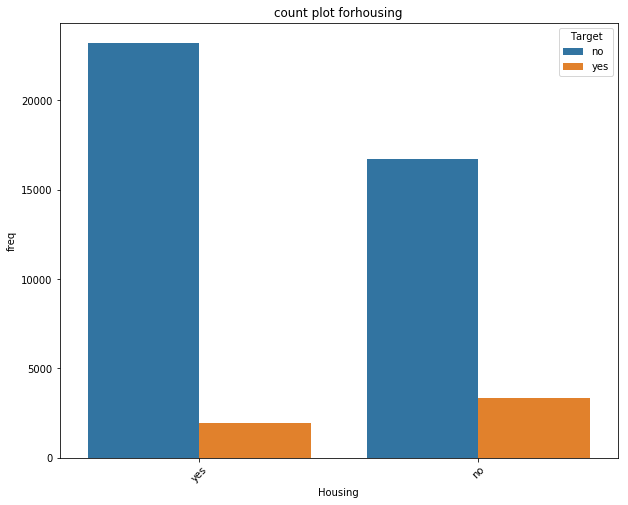

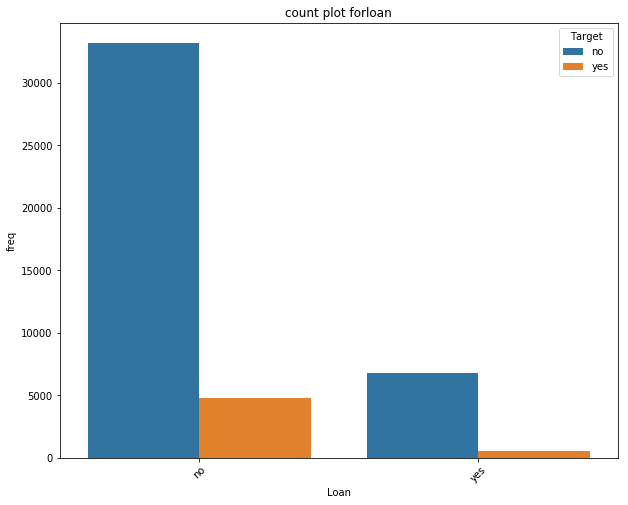

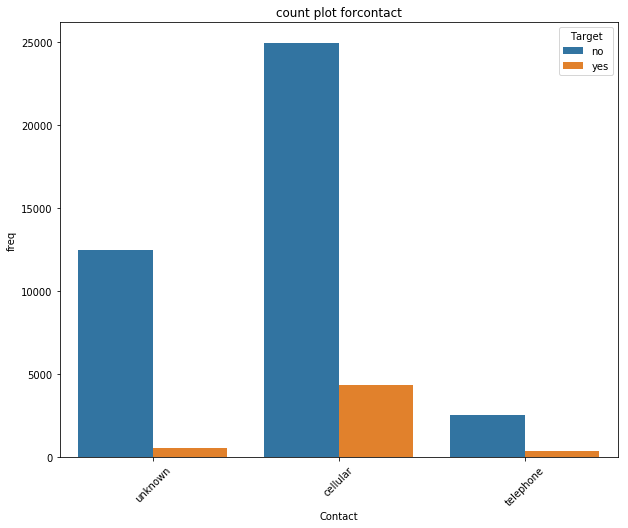

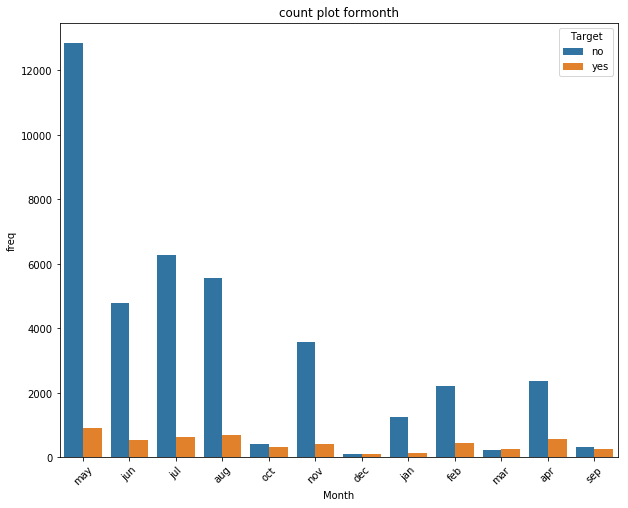

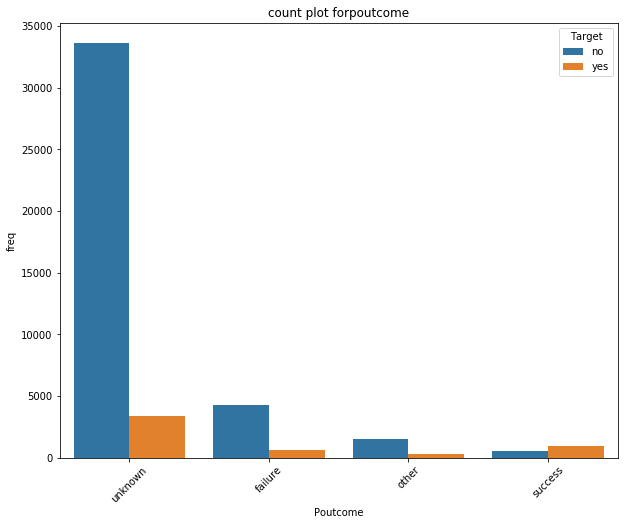

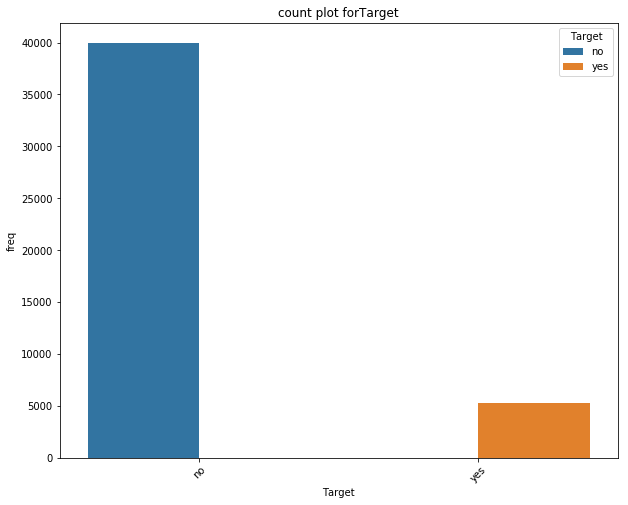

In [39]:
for cols in cat_cols:
    
    plt.figure(figsize = (10,8))
    sns.countplot(x = cols, hue = 'Target', data = df)
    plt.xlabel(cols.capitalize())
    plt.ylabel("freq")
    plt.title("count plot for" +cols)
    plt.savefig("CountPlot/countplot For {}.jpg".format(cols.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)

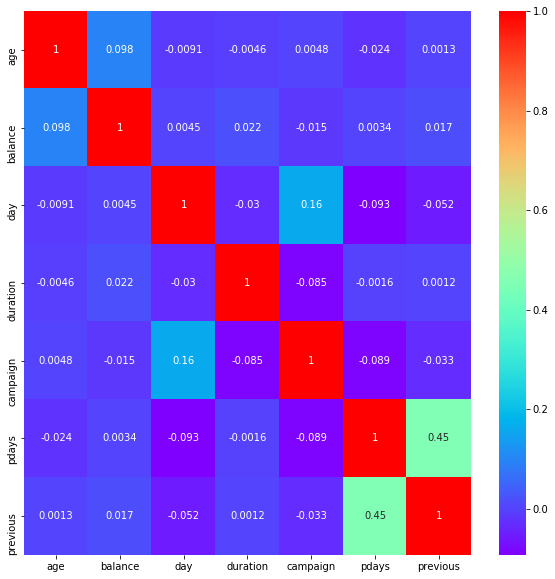

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'rainbow', annot =True)
plt.savefig("heatmap/heatmap for df.jpg", dpi =100, bbox_tight = True)

In [41]:


for cols in cat_cols:
    print(cols)
    
    
    print(df[cols].value_counts()/df[cols].count()*100)

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64
marital
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64
education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64
default
no     98.197341
yes     1.802659
Name: default, dtype: float64
housing
yes    55.583818
no     44.416182
Name: housing, dtype: float64
loan
no     83.977351
yes    16.022649
Name: loan, dtype: float64
contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64
month
may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049


In [42]:
for col in cat_cols:
    print(col)
    print(df[df['Target']=='yes'][col].value_counts()/df[df['Target']=='yes'][col].count()*100)
    

job
management       24.598223
technician       15.882019
blue-collar      13.386273
admin.           11.930422
retired           9.756098
services          6.976744
student           5.086028
unemployed        3.819247
self-employed     3.535640
entrepreneur      2.325581
housemaid         2.060881
unknown           0.642844
Name: job, dtype: float64
marital
married     52.089242
single      36.150501
divorced    11.760257
Name: marital, dtype: float64
education
secondary    46.322556
tertiary     37.738703
primary      11.174135
unknown       4.764606
Name: education, dtype: float64
default
no     99.016827
yes     0.983173
Name: default, dtype: float64
housing
no     63.414634
yes    36.585366
Name: housing, dtype: float64
loan
no     90.848932
yes     9.151068
Name: loan, dtype: float64
contact
cellular     82.605407
unknown      10.020798
telephone     7.373795
Name: contact, dtype: float64
month
may    17.489128
aug    13.008130
jul    11.854793
apr    10.909435
jun    10.323313


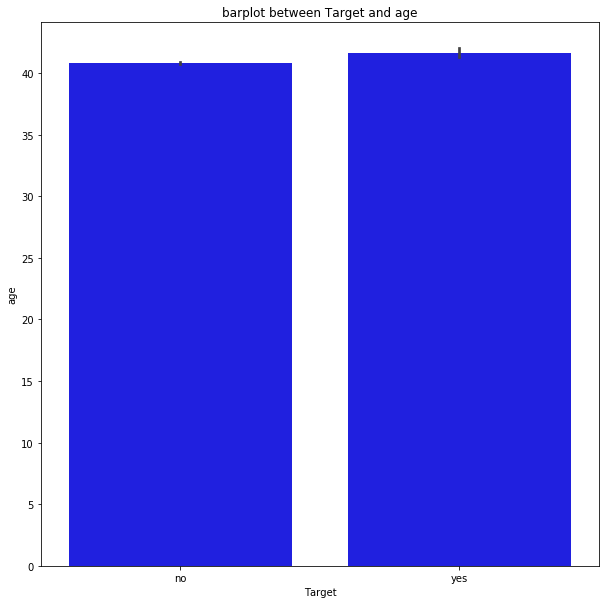

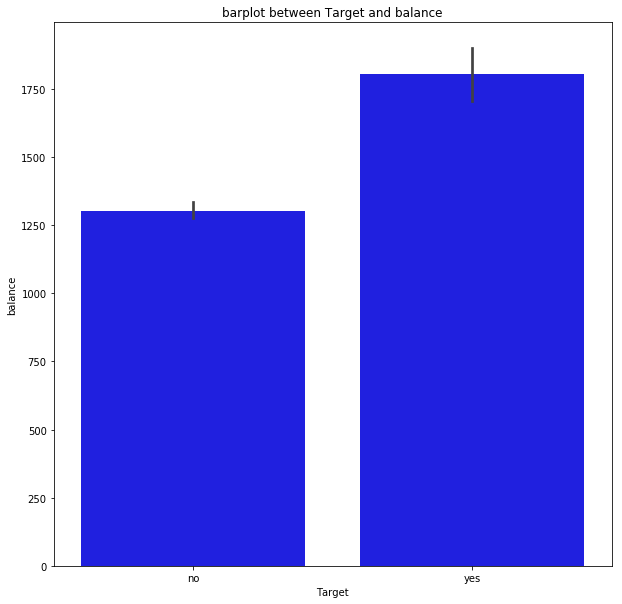

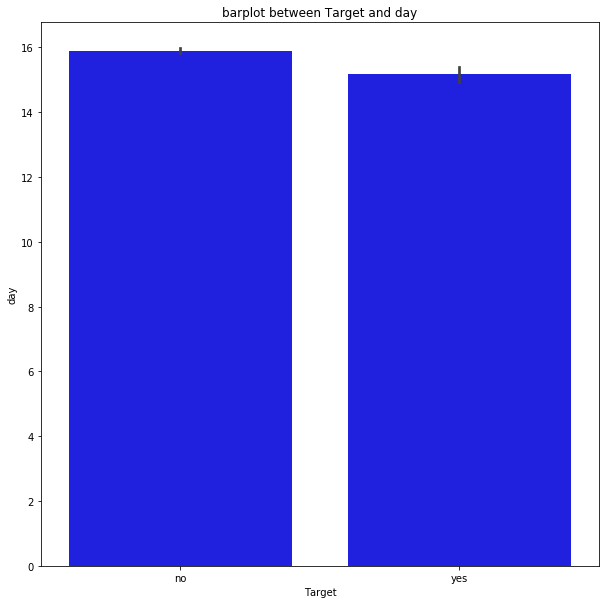

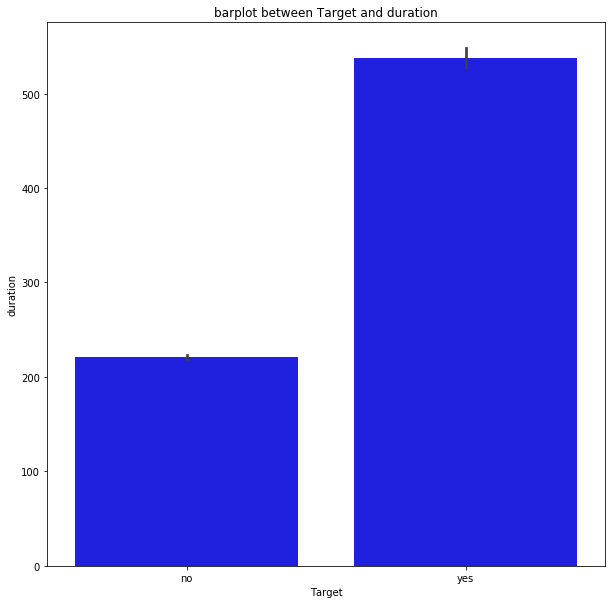

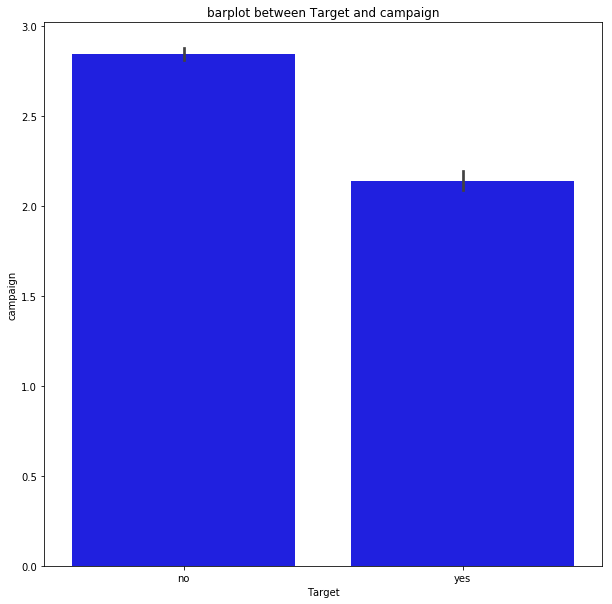

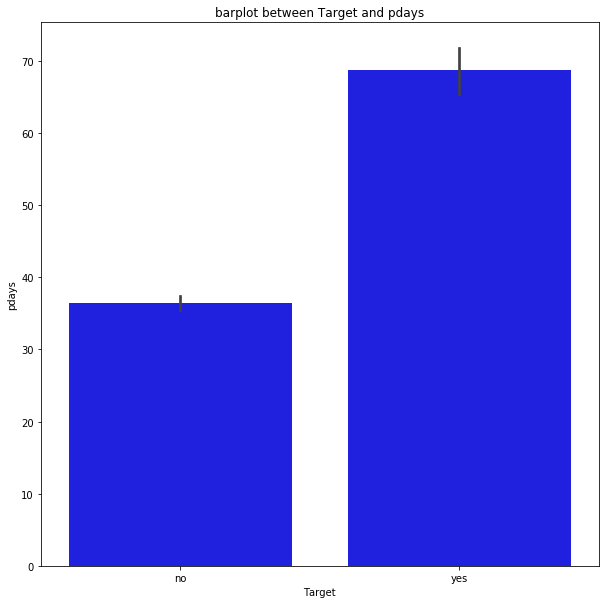

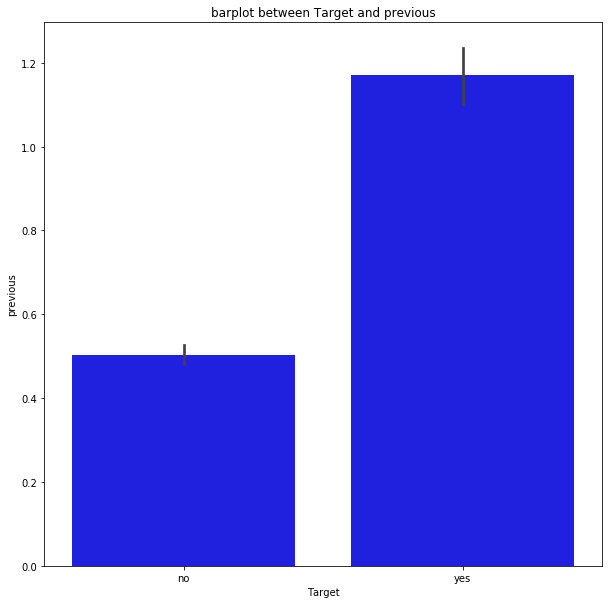

In [43]:
for num in num_cols:
    plt.figure(figsize =(10,10))
    sns.barplot(x = 'Target', y= num , data = df, color = 'blue')
    plt.title("barplot between Target and {}".format(num) )
    plt.xlabel('Target')
    plt.ylabel(num)
    plt.savefig('Barplot/barplot for {}'.format(num))

In [44]:
df[df['Target'] == 'yes']['duration'].mean()

537.2945736434109

In [45]:
df[df['Target'] == 'yes']['balance'].mean()

1804.2679145396105

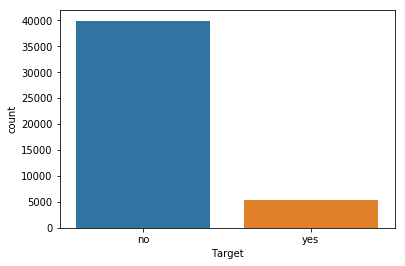

In [46]:
sns.countplot(df['Target'])

In [47]:
print(df['Target'].value_counts()/df['Target'].count()*100)

no     88.30152
yes    11.69848
Name: Target, dtype: float64


Majority of people have not applied for term deposit

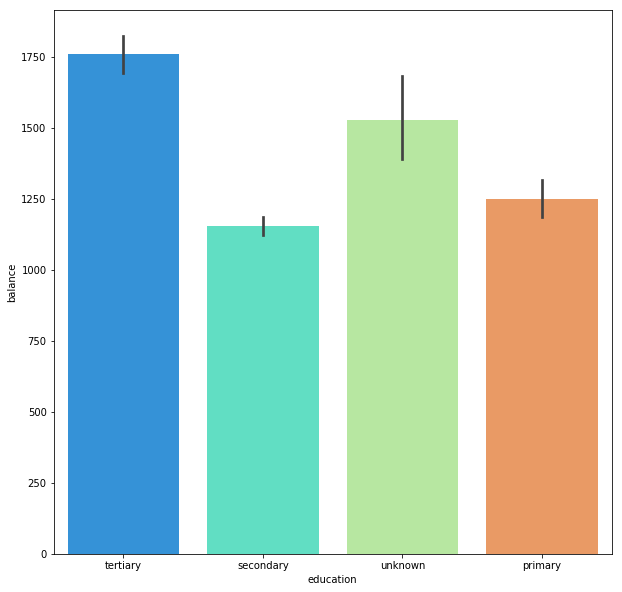

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'education', y ='balance', data = df, palette= 'rainbow')

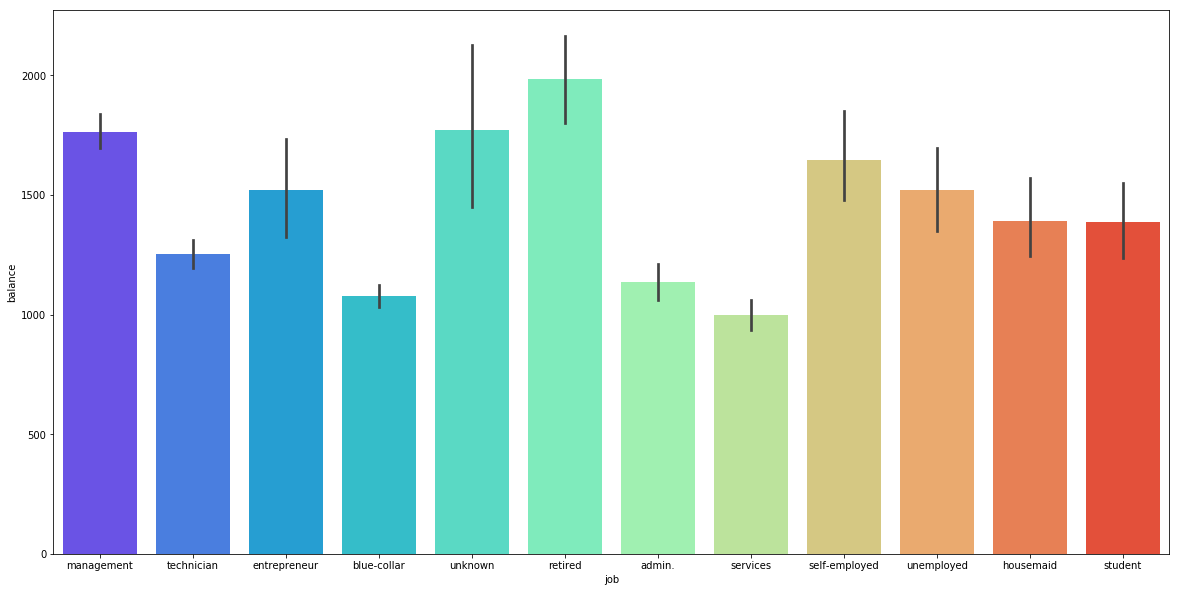

In [49]:
plt.figure(figsize= (20,10))
sns.barplot(x = 'job', y ='balance', data = df, palette= 'rainbow')

In [50]:
pd.crosstab(df['housing'], df['Target'], margins = True)

Target,no,yes,All
housing,,,
no,16727,3354,20081
yes,23195,1935,25130
All,39922,5289,45211


In [51]:
pd.crosstab(df['loan'], df['Target'], margins = True)

Target,no,yes,All
loan,,,
no,33162,4805,37967
yes,6760,484,7244
All,39922,5289,45211


In [52]:
pd.crosstab(df['contact'], df['Target'],  margins = True)

Target,no,yes,All
contact,,,
cellular,24916,4369,29285
telephone,2516,390,2906
unknown,12490,530,13020
All,39922,5289,45211


In [53]:
pd.crosstab(df['month'], df['Target'], margins = True)

Target,no,yes,All
month,,,
apr,2355,577,2932
aug,5559,688,6247
dec,114,100,214
feb,2208,441,2649
jan,1261,142,1403
jul,6268,627,6895
jun,4795,546,5341
mar,229,248,477
may,12841,925,13766


In [54]:
pd.crosstab(df.poutcome, df.Target, margins = True)

Target,no,yes,All
poutcome,,,
failure,4283,618,4901
other,1533,307,1840
success,533,978,1511
unknown,33573,3386,36959
All,39922,5289,45211


In [55]:
pd.crosstab(df['job'], [df['Target'], df['housing'] ], margins = True)

Target            no          yes          All
housing           no    yes    no   yes       
job                                           
admin.          1645   2895   344   287   5171
blue-collar     2411   6613   273   435   9732
entrepreneur     548    816    70    53   1487
housemaid        757    374    85    24   1240
management      3910   4247   870   431   9458
retired         1309    439   464    52   2264
self-employed    695    697   119    68   1579
services        1204   2581   184   185   4154
student          442    227   247    22    938
technician      2978   3779   504   336   7597
unemployed       598    503   162    40   1303
unknown          230     24    32     2    288
All            16727  23195  3354  1935  45211

In [56]:
pd.crosstab(df['job'], [df['Target'], df['loan'] ], margins = True)

Target            no         yes         All
loan              no   yes    no  yes       
job                                         
admin.          3632   908   548   83   5171
blue-collar     7447  1577   601  107   9732
entrepreneur    1025   339   106   17   1487
housemaid        984   147   104    5   1240
management      6996  1161  1209   92   9458
retired         1460   288   495   21   2264
self-employed   1183   209   167   20   1579
services        2997   788   321   48   4154
student          657    12   269    0    938
technician      5530  1227   758   82   7597
unemployed       999   102   195    7   1303
unknown          252     2    32    2    288
All            33162  6760  4805  484  45211

In [57]:
pd.crosstab(df['job'], [df['Target'], df['contact'] ], margins = True)

Target              no                        yes                      All
contact       cellular telephone unknown cellular telephone unknown       
job                                                                       
admin.            2825       248    1467      529        41      61   5171
blue-collar       4642       573    3809      514        38     156   9732
entrepreneur       865        71     428       89        16      18   1487
housemaid          664       137     330       84        14      11   1240
management        5867       411    1879     1154        60      87   9458
retired           1004       276     468      366       129      21   2264
self-employed      931        86     375      153        12      22   1579
services          2195       212    1378      303        16      50   4154
student            451        80     138      246        19       4    938
technician        4650       294    1813      731        27      82   7597
unemployed         718        87     296      173        13      16   1303
unknown            104        41     109       27         5       2    288
All              24916      2516   12490     4369       390     530  45211

In [58]:
pd.crosstab(df['education'], [df['Target'], df['housing']], margins = True)

Target        no          yes          All
housing       no    yes    no   yes       
education                                 
primary     2591   3669   366   225   6851
secondary   7751  13001  1413  1037  23202
tertiary    5541   5764  1382   614  13301
unknown      844    761   193    59   1857
All        16727  23195  3354  1935  45211

In [59]:
pd.crosstab(df['education'], [df['Target'], df['loan'] ], margins = True)

Target        no         yes         All
loan          no   yes    no  yes       
education                               
primary     5286   974   541   50   6851
secondary  16743  4009  2156  294  23202
tertiary    9652  1653  1865  131  13301
unknown     1481   124   243    9   1857
All        33162  6760  4805  484  45211

# Data Cleaning

# 3)c) Checking the presence of missing values (4 marks)

In [60]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [61]:
df['balance'] = df[df['balance']>0]

In [62]:
df.shape

(45211, 17)

# Dummification and one hot encoding 

In [63]:
cat_cols[0:-1]

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [64]:
dummy = pd.get_dummies(df[cat_cols[0:-1]])
dummy.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_divorced       45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_primary      45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
default_no             45211 non-null uint8
default_yes

# One hot encoding

In [47]:
df['Target'] = pd.Categorical(df['Target'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      37931 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null category
dtypes: category(1), float64(1), int64(5), object(10)
memory usage: 5.6+ MB


In [49]:
df['Target'] = df['Target'].cat.codes

In [50]:
df['Target'].head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int8

In [51]:
num_cols = list(df.describe().columns)


In [52]:
bank_final = pd.concat((df[num_cols], dummy), axis = 1)

In [53]:
bank_final.columns

Index(['age', 'day', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [54]:
A= bank_final.drop('Target', axis = 1)

In [55]:
y = bank_final['Target']

# SCALING OF DATA

In [56]:
from sklearn.preprocessing import MinMaxScaler
a = MinMaxScaler()
X= a.fit_transform(A)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [66]:
y_train.value_counts()

0    27909
1     3738
Name: Target, dtype: int64

# oversampling

In [16]:
import imblearn



In [17]:
from imblearn.over_sampling import SMOTE 

In [18]:
sm = SMOTE(random_state = 1, sampling_strategy = 1)

In [19]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

NameError: name 'X_train' is not defined

In [20]:
y_train_new.value_counts()

NameError: name 'y_train_new' is not defined

# 5) Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log.fit(X_train_new,y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
p = log.predict(X_test)

In [ ]:
print(accuracy_score(y_train_new, log.predict(X_train_new)))
print(accuracy_score(y_test, log.predict(X_test) ))

In [ ]:
print(classification_report(y_train_new, log.predict(X_train_new)))
print(classification_report(y_test,log.predict(X_test) ))

In [ ]:
tpr, fpr , threshold = roc_curve(y_test, log.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c='r', label = "ROC"):
    plt.figure(figsize=(8,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver operating characteristic')
    plt.savefig('Roc_curve_LogReg')

In [ ]:
roc_curve(tpr, fpr)

In [ ]:
Area_Under_curve = roc_auc_score(y_test, log.predict_proba(X_test)[:,1])
print(Area_Under_curve)

In [ ]:
c = confusion_matrix(y_test, log.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for logreg')

# Naive Bayes-naive classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()

In [ ]:
model_naive.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, model_naive.predict(X_train_new)))
print(accuracy_score(y_test, model_naive.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, model_naive.predict(X_train_new)))
print(classification_report(y_test, model_naive.predict(X_test)))

In [ ]:
tpr, fpr, thresholds = roc_curve(y_test, model_naive.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c='r', label = "ROC"):
    plt.figure(figsize=(8,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver operating characteristic')
    plt.savefig('Roc_curve_naive-Bayes')

In [ ]:
roc_curve(tpr, fpr)

In [ ]:
Area_Under_curve = roc_auc_score(y_test, model_naive.predict_proba(X_test)[:,1])
print(Area_Under_curve)

In [ ]:
c = confusion_matrix(y_test, model_naive.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for model naive')

# KNearestNeighbour Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
score_train = []
score_test= []

In [ ]:
k = list(range(1,20)) #We iterate the list to 20

n = list(filter(lambda x : x%2!= 0, k))

In [ ]:
from sklearn.metrics import *

In [ ]:
for i in n:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    print('value of k is {}'.format(i))
    a = accuracy_score(y_train, model.predict(X_train))
    print('test accuracy')
    print(accuracy_score(y_test, model.predict(X_test)))
    b = accuracy_score(y_test, model.predict(X_test))
    score_train.append(a)
    score_test.append(b)  

In [ ]:
                 



print(max(score_test)) # max accuracy

n[score_test.index(max(score_test))]  #n value for  max test accuracy

In [ ]:
auc = []

for i in n:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    print('value of k is {}'.format(i))
    Auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(Auc)
    auc.append(Auc)

In [ ]:
print(max(auc))
print(n[auc.index(max(auc))])

In [ ]:
model_new = KNeighborsClassifier(n_neighbors = 19, weights = 'distance' )
model_new.fit(X_train, y_train)

In [ ]:
tpr, fpr, thresholds = roc_curve(y_test, model_new.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_KNN')

In [ ]:
roc_curve(tpr, fpr)

In [ ]:
model_n = KNeighborsClassifier(n_neighbors = 11, weights = 'distance' )
model_n.fit(X_train, y_train)

print(classification_report(y_train, model_n.predict(X_train)))
print(classification_report(y_test, model_n.predict(X_test)))

In [ ]:
c = confusion_matrix(y_test, model_n.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for overfittree')

# Overfit decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy',
    splitter='best')

In [ ]:
dtree.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new , dtree.predict(X_train_new)))
print(accuracy_score(y_test , dtree.predict(X_test)))

In [ ]:
print(classification_report(y_train_new , dtree.predict(X_train_new)))
print(classification_report(y_test, dtree.predict(X_test)))

In [ ]:
tpr_1, fpr_1, thresholds_1 = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_Decisiontree')

In [ ]:
roc_curve(tpr_1, fpr_1)

In [ ]:
print("area under curve is {}".format(roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])))

In [ ]:
c = confusion_matrix(y_test, dtree.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for overfittree')

# Tree with depth 10

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state = 1)

In [ ]:
dtree2.fit(X_train_new, y_train_new)

In [ ]:
dtree2.get_depth()

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new , dtree2.predict(X_train_new)))
print(accuracy_score(y_test , dtree2.predict(X_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth':[5,10,15,20], 'criterion':['gini','entropy']},{'max_depth':[5,10,15,20], 'criterion':['gini','entropy']}]
 
            

In [ ]:
grid_search = GridSearchCV(estimator = dtree2, param_grid = parameters, scoring = 'roc_auc', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train_new, y_train_new)

In [ ]:
grid_search.best_score_

In [ ]:
sorted(SCORERS.keys())

In [ ]:
grid_search.best_params_   #this is the best combination of parameters for thsi model

In [ ]:
print(classification_report(y_train_new , dtree2.predict(X_train_new)))
print(classification_report(y_test, dtree2.predict(X_test)))

In [ ]:
tpr, fpr, thresholds = roc_curve(y_test, dtree2.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_Decisiontreedepth10')

In [ ]:
roc_curve(tpr, fpr)

In [ ]:
print("area under curve is {}".format(roc_auc_score(y_test, dtree2.predict_proba(X_test)[:,1])))

In [ ]:
c = confusion_matrix(y_test, dtree2.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for tree with depth 10')

# 1) Among the base models, comaparing logistic Regression and "tree with depth 10", we find that the accuracy is greater for "tree with depth 10 " model. But area under curve is more for logistic regression model.



# 2) Moreover for this dataset false negative has to be as less as possible to be a good model. For "tree with depth 10 "the false negative is more than Logistic Regression 




# 6) Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees

# 1) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rand = RandomForestClassifier(n_estimators = 50, random_state=1)
model_rand.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, model_rand.predict(X_train_new)))
print(accuracy_score(y_test, model_rand.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, model_rand.predict(X_train_new)))
print(classification_report(y_test, model_rand.predict(X_test)))

In [ ]:
tpr_2, fpr_2, threshold = roc_curve(y_test, model_rand.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_RandomForest')

In [ ]:
roc_curve(tpr_2, fpr_2)

In [ ]:
print("area under curve is {}".format(roc_auc_score(y_test, model_rand.predict_proba(X_test)[:,1])))

In [ ]:
c = confusion_matrix(y_test, model_rand.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g')
plt.savefig('Conf_matrix for randforest')

# 2) Bagging Classifier(we use base estimator as the overfitted tree model mentioned above

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_1 = BaggingClassifier(base_estimator=dtree,
    n_estimators=50, bootstrap=True, random_state=1)

In [ ]:
bag_1.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, bag_1.predict(X_train_new)))
print(accuracy_score(y_test, bag_1.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, bag_1.predict(X_train_new)))
print(classification_report(y_test, bag_1.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, bag_1.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_BaggingClassifier')

In [ ]:
roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, bag_1.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, bag_1.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for bag_1')

# Now we greate a bagging classifier with no base estimators

# Bagging classifier 2

In [ ]:
bag_2 = BaggingClassifier(n_estimators = 50, random_state=1, bootstrap=True )

In [ ]:
bag_2.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

print(accuracy_score(y_train_new, bag_2.predict(X_train_new)))
print(accuracy_score(y_test, bag_2.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, bag_2.predict(X_train_new)))
print(classification_report(y_test, bag_2.predict(X_test)))

In [ ]:


tpr, fpr, threshold = roc_curve(y_test, bag_2.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_BaggingClassifier_2')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, bag_2.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_train, bag_2.predict(X_train), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for bag_2')

# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=1)

In [ ]:
ada.fit(X_train_new, y_train_new)

from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, ada.predict(X_train_new)))
print(accuracy_score(y_test, ada.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, ada.predict(X_train_new)))
print(classification_report(y_test, ada.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_AdaBoost')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, ada.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, ada.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for adaboost_1')

# Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad = GradientBoostingClassifier(learning_rate=0.1,
    n_estimators=50)

In [ ]:
grad.fit(X_train_new, y_train_new)

from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, grad.predict(X_train_new)))
print(accuracy_score(y_test, grad.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, grad.predict(X_train_new)))
print(classification_report(y_test, grad.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, grad.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_GradientBoostClassifier')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, grad.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, grad.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g')
plt.savefig('Conf_matrix for grad')

# Now we use AdaBoostClassifier with base_estimator as a tree with depth 4 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada2 = AdaBoostClassifier(base_estimator=dtree2,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=1,)

In [ ]:
ada2.fit(X_train_new, y_train_new)

from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, ada2.predict(X_train_new)))
print(accuracy_score(y_test, ada2.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, ada2.predict(X_train_new)))
print(classification_report(y_test, ada2.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, ada2.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_AdaBoost_2')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, ada2.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, ada2.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g')
plt.savefig('Conf_matrix for adaboost2')

# Stacking Classifier

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
stack = StackingClassifier(classifiers = [dtree2, model_naive, log ],
    meta_classifier = ada,
    use_probas=True,)

In [ ]:
stack.fit(X_train_new, y_train_new)

from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, stack.predict(X_train_new)))
print(accuracy_score(y_test, stack.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, stack.predict(X_train_new)))
print(classification_report(y_test, stack.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, stack.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_StackingClassifier')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, stack.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, stack.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')
plt.savefig('Conf_matrix for stack')

# XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()

In [ ]:
xg.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, xg.predict(X_train_new)))
print(accuracy_score(y_test, xg.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, xg.predict(X_train_new)))
print(classification_report(y_test, xg.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, xg.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_xgboostClassifier')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, xg.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, xg.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g')
plt.savefig('Conf_matrix for xgboost')

# Light GBM boost model

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
light = LGBMClassifier(boosting_type='gbdt', max_depth=-1, learning_rate=0.1,
    n_estimators=100, random_state = 1)

In [ ]:
light.fit(X_train_new, y_train_new)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_train_new, light.predict(X_train_new)))
print(accuracy_score(y_test, light.predict(X_test)))

In [ ]:
print(classification_report(y_train_new, light.predict(X_train_new)))
print(classification_report(y_test, light.predict(X_test)))

In [ ]:
tpr, fpr, threshold = roc_curve(y_test, light.predict_proba(X_test)[:,1])

In [ ]:
def roc_curve(tpr, fpr, c = 'r', label = "ROC curve"):
    plt.figure(figsize = (10,8))
    plt.plot(tpr, fpr, color = c, linewidth = 3, label = label)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0 , 1.0])
    plt.plot([0, 1], [0, 1],'g--')
    plt.title('ROC')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.savefig('ROC_LightGbm')

In [ ]:
   

roc_curve(tpr,fpr)

In [ ]:
print(roc_auc_score(y_test, light.predict_proba(X_test)[:,1]))

In [ ]:
c = confusion_matrix(y_test, light.predict(X_test), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g')
plt.savefig('Conf_matrix for light')

# We find that ensemble models have more accuracy and Area under curve compared to base models. In ensemble models we combine many base models (series or parallel)


# and combine those models to create a strong model.

# 7) Compare performances of all the models (5 marks)

# So "Logistic Regression" is the best among the base models

# So "LightGBM " is the best among the ensemble models

# "LightGBM " is the best among all the models